# Sprint 1: Temel İstatistiksel Analiz ve Hipotez Testleri

Bu notebook, Sprint 1 kapsamında temel istatistiksel hipotez testlerini, etki büyüklüklerini
ve korelasyon analizlerini gerçekleştirir.

**Yazar:** Erdem Gunal  
**Tarih:** 2024  
**Sprint:** 1 - Temel İstatistiksel Analiz ve Hipotez Testleri

## 1. Gerekli Kütüphanelerin Yüklenmesi

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, pearsonr, spearmanr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Proje kök dizinini Python path'ine ekle
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# İstatistiksel analiz modülünü import et
from src.statistical_analysis import StatisticalAnalyzer

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Kütüphaneler başarıyla yüklendi!")

Kütüphaneler başarıyla yüklendi!


## 2. Veri Yükleme ve İlk İnceleme

In [21]:
# Çalışma dizinini proje kök dizinine değiştir
os.chdir("/Users/erdemgunal/Desktop/salary_analysis_project")

# StatisticalAnalyzer örneği oluştur
analyzer = StatisticalAnalyzer()

# Veriyi yükle
df = analyzer.load_data()

print(f"Veri seti boyutu: {df.shape}")
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")

2025-08-24 17:56:30,634 - INFO - Veri yükleniyor: data/cleaned_data.csv
2025-08-24 17:56:30,667 - INFO - Veri başarıyla yüklendi. Boyut: (2969, 81)


Veri seti boyutu: (2969, 81)
Satır sayısı: 2969
Sütun sayısı: 81


In [22]:
# Temel değişkenlerin özeti
print("=== TEMEL DEĞİŞKENLERİN ÖZETİ ===")

if 'ortalama_maas' in df.columns:
    print(f"\nMaaş İstatistikleri:")
    print(f"Ortalama: {df['ortalama_maas'].mean():.2f} bin TL")
    print(f"Medyan: {df['ortalama_maas'].median():.2f} bin TL")
    print(f"Standart Sapma: {df['ortalama_maas'].std():.2f} bin TL")
    print(f"Min: {df['ortalama_maas'].min():.2f} bin TL")
    print(f"Max: {df['ortalama_maas'].max():.2f} bin TL")

if 'cinsiyet' in df.columns:
    print(f"\nCinsiyet Dağılımı:")
    gender_counts = df['cinsiyet'].value_counts()
    print(f"Erkek (0): {gender_counts[0]} kişi (%{gender_counts[0]/len(df)*100:.1f})")
    print(f"Kadın (1): {gender_counts[1]} kişi (%{gender_counts[1]/len(df)*100:.1f})")

if 'frontend_react' in df.columns:
    print(f"\nReact Kullanımı:")
    react_users = df['frontend_react'].sum()
    print(f"React kullanan: {react_users} kişi (%{react_users/len(df)*100:.1f})")
    print(f"React kullanmayan: {len(df) - react_users} kişi (%{(len(df) - react_users)/len(df)*100:.1f})")

=== TEMEL DEĞİŞKENLERİN ÖZETİ ===

Maaş İstatistikleri:
Ortalama: 100.46 bin TL
Medyan: 85.50 bin TL
Standart Sapma: 61.27 bin TL
Min: 5.00 bin TL
Max: 305.00 bin TL

Cinsiyet Dağılımı:
Erkek (0): 2705 kişi (%91.1)
Kadın (1): 264 kişi (%8.9)

React Kullanımı:
React kullanan: 1008 kişi (%34.0)
React kullanmayan: 1961 kişi (%66.0)


## 3. İstatistiksel Analizler

In [23]:
# Tüm istatistiksel analizleri çalıştır
print("=== İSTATİSTİKSEL ANALİZLER BAŞLATILIYOR ===")

results = analyzer.run_all_analyses()

print(f"\nToplam {len(results)} analiz tamamlandı!")

2025-08-24 17:56:33,107 - INFO - Tüm istatistiksel analizler başlatılıyor...
2025-08-24 17:56:33,108 - INFO - React kullanımının maaşa etkisi analiz ediliyor...
2025-08-24 17:56:33,123 - INFO - React analizi tamamlandı. p-value: 0.2278, Cohen's d: -0.047
2025-08-24 17:56:33,124 - INFO - Çalışma şeklinin maaşa etkisi analiz ediliyor...
2025-08-24 17:56:33,283 - INFO - Çalışma şekli analizi tamamlandı. p-value: 0.0000, Eta-squared: 0.027
2025-08-24 17:56:33,284 - INFO - Şirket lokasyonunun maaşa etkisi analiz ediliyor...


=== İSTATİSTİKSEL ANALİZLER BAŞLATILIYOR ===


2025-08-24 17:56:33,464 - INFO - Lokasyon analizi tamamlandı. p-value: 0.0000, Eta-squared: 0.110
2025-08-24 17:56:33,464 - INFO - Cinsiyet bazlı maaş farkı analiz ediliyor...
2025-08-24 17:56:33,467 - INFO - Gender gap analizi tamamlandı. p-value: 0.0004, Gap: 15.9%
2025-08-24 17:56:33,467 - INFO - Deneyim-maaş korelasyonu analiz ediliyor...
2025-08-24 17:56:33,474 - INFO - Korelasyon analizi tamamlandı. Pearson r: 0.224, Spearman r: 0.359
2025-08-24 17:56:33,475 - INFO - Tüm analizler tamamlandı!



Toplam 5 analiz tamamlandı!


## 4. React Kullanımının Maaşa Etkisi Analizi

In [24]:
# React analizi sonuçları
react_result = results['react_analysis']

print("=== REACT KULLANIMININ MAAŞA ETKİSİ ===")
print(f"Test Türü: {react_result['test_type']}")
print(f"Gruplar: {react_result['groups'][0]} vs {react_result['groups'][1]}")
print(f"\nGrup İstatistikleri:")
print(f"  {react_result['groups'][0]}: n={react_result['n1']}, M={react_result['mean1']:.2f}, SD={react_result['std1']:.2f}")
print(f"  {react_result['groups'][1]}: n={react_result['n2']}, M={react_result['mean2']:.2f}, SD={react_result['std2']:.2f}")
print(f"\nTest Sonuçları:")
print(f"  t-istatistiği: {react_result['t_statistic']:.3f}")
print(f"  p-değeri: {react_result['p_value']:.4f}")
print(f"  Anlamlı: {'Evet' if react_result['significant'] else 'Hayır'}")
print(f"  Cohen's d: {react_result['cohens_d']:.3f} ({react_result['effect_size_interpretation']})")
print(f"  %95 Güven Aralığı: [{react_result['ci_lower']:.2f}, {react_result['ci_upper']:.2f}]")

=== REACT KULLANIMININ MAAŞA ETKİSİ ===
Test Türü: Independent t-test
Gruplar: React Kullanıcıları vs React Kullanmayanlar

Grup İstatistikleri:
  React Kullanıcıları: n=1008, M=98.57, SD=62.63
  React Kullanmayanlar: n=1961, M=101.43, SD=60.55

Test Sonuçları:
  t-istatistiği: -1.206
  p-değeri: 0.2278
  Anlamlı: Hayır
  Cohen's d: -0.047 (Küçük)
  %95 Güven Aralığı: [-7.57, 1.84]


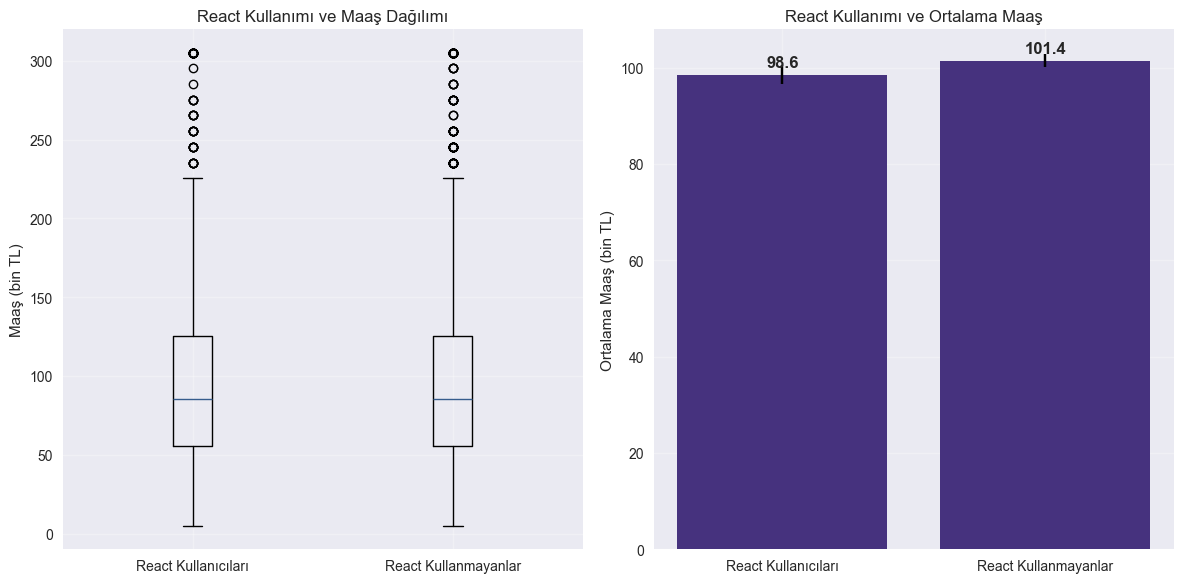

In [25]:
# React kullanımı görselleştirmesi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
react_users = df[df['frontend_react'] == 1]['ortalama_maas']
non_react_users = df[df['frontend_react'] == 0]['ortalama_maas']

plt.boxplot([react_users, non_react_users], labels=['React Kullanıcıları', 'React Kullanmayanlar'])
plt.title('React Kullanımı ve Maaş Dağılımı')
plt.ylabel('Maaş (bin TL)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
means = [react_users.mean(), non_react_users.mean()]
sems = [react_users.sem(), non_react_users.sem()]
bars = plt.bar(['React Kullanıcıları', 'React Kullanmayanlar'], means, yerr=sems, capsize=5)
plt.title('React Kullanımı ve Ortalama Maaş')
plt.ylabel('Ortalama Maaş (bin TL)')
plt.grid(True, alpha=0.3)

# Değerleri çubukların üzerine yaz
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{mean:.1f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Çalışma Şeklinin Maaşa Etkisi Analizi

In [26]:
# Çalışma şekli analizi sonuçları
work_result = results['work_type_analysis']

print("=== ÇALIŞMA ŞEKLİNİN MAAŞA ETKİSİ ===")
print(f"Test Türü: {work_result['test_type']}")
print(f"Gruplar: {', '.join(work_result['groups'])}")
print(f"\nGrup İstatistikleri:")
for group, stats in work_result['group_stats'].items():
    print(f"  {group}: n={stats['n']}, M={stats['mean']:.2f}, SD={stats['std']:.2f}")
print(f"\nTest Sonuçları:")
print(f"  F-istatistiği: {work_result['f_statistic']:.3f}")
print(f"  p-değeri: {work_result['p_value']:.4f}")
print(f"  Anlamlı: {'Evet' if work_result['significant'] else 'Hayır'}")
print(f"  Eta-squared: {work_result['eta_squared']:.3f} ({work_result['effect_size_interpretation']})")

=== ÇALIŞMA ŞEKLİNİN MAAŞA ETKİSİ ===
Test Türü: One-way ANOVA
Gruplar: Remote, Office, Hybrid

Grup İstatistikleri:
  Remote: n=1350, M=104.22, SD=63.81
  Office: n=573, M=80.11, SD=55.08
  Hybrid: n=1046, M=106.76, SD=58.83

Test Sonuçları:
  F-istatistiği: 40.719
  p-değeri: 0.0000
  Anlamlı: Evet
  Eta-squared: 0.027 (Orta)


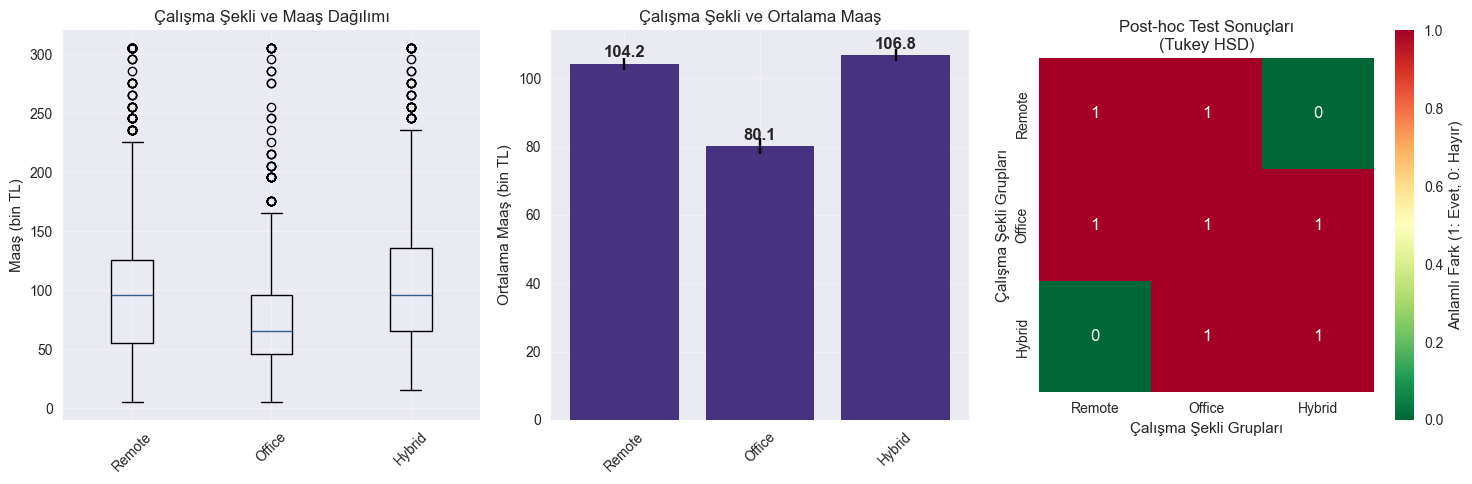

In [38]:
# Çalışma şekli görselleştirmesi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
work_types = ['Remote', 'Office', 'Hybrid']
work_salaries = []
for i in range(3):
    work_salaries.append(df[df['calisma_sekli'] == i]['ortalama_maas'])

plt.boxplot(work_salaries, labels=work_types)
plt.title('Çalışma Şekli ve Maaş Dağılımı')
plt.ylabel('Maaş (bin TL)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
means = [group.mean() for group in work_salaries]
sems = [group.sem() for group in work_salaries]
bars = plt.bar(work_types, means, yerr=sems, capsize=5)
plt.title('Çalışma Şekli ve Ortalama Maaş')
plt.ylabel('Ortalama Maaş (bin TL)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Değerleri çubukların üzerine yaz
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{mean:.1f}', 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 3)
# Post-hoc test sonuçları görselleştirmesi - İYİLEŞTİRİLMİŞ
tukey_result = work_result['tukey_result']

# Tukey sonuçlarını DataFrame'e çevir
tukey_df = pd.DataFrame(tukey_result._results_table.data[1:], 
                        columns=tukey_result._results_table.data[0])

# Grup isimlerini al
groups = work_types
n_groups = len(groups)

# Significance matrix oluştur
significance_matrix = np.zeros((n_groups, n_groups))
p_values_matrix = np.zeros((n_groups, n_groups))

for _, row in tukey_df.iterrows():
    group1_idx = groups.index(row['group1'])
    group2_idx = groups.index(row['group2'])
    p_adj = float(row['p-adj'])
    reject = row['reject']
    
    # Significance matrix (1: significant, 0: not significant)
    significance_matrix[group1_idx, group2_idx] = 1 if reject else 0
    significance_matrix[group2_idx, group1_idx] = 1 if reject else 0
    
    # P-values matrix
    p_values_matrix[group1_idx, group2_idx] = p_adj
    p_values_matrix[group2_idx, group1_idx] = p_adj

# Diagonal'i 1 yap (kendisiyle karşılaştırma)
np.fill_diagonal(significance_matrix, 1)

# İYİLEŞTİRİLMİŞ: seaborn heatmap kullan
sns.heatmap(significance_matrix, 
            xticklabels=groups, 
            yticklabels=groups, 
            annot=True, 
            cmap='RdYlGn_r', 
            cbar_kws={'label': 'Anlamlı Fark (1: Evet, 0: Hayır)'},
            fmt='.0f',
            square=True)  # Kare şeklinde yap

plt.title('Post-hoc Test Sonuçları\n(Tukey HSD)')
plt.xlabel('Çalışma Şekli Grupları')
plt.ylabel('Çalışma Şekli Grupları')

plt.tight_layout()
plt.show()

## 6. Şirket Lokasyonunun Maaşa Etkisi Analizi

In [31]:
# Lokasyon analizi sonuçları
location_result = results['location_analysis']

print("=== ŞİRKET LOKASYONUNUN MAAŞA ETKİSİ ===")
print(f"Test Türü: {location_result['test_type']}")
print(f"Gruplar: {', '.join(location_result['groups'])}")
print(f"\nGrup İstatistikleri:")
for group, stats in location_result['group_stats'].items():
    print(f"  {group}: n={stats['n']}, M={stats['mean']:.2f}, SD={stats['std']:.2f}")
print(f"\nTest Sonuçları:")
print(f"  F-istatistiği: {location_result['f_statistic']:.3f}")
print(f"  p-değeri: {location_result['p_value']:.4f}")
print(f"  Anlamlı: {'Evet' if location_result['significant'] else 'Hayır'}")
print(f"  Eta-squared: {location_result['eta_squared']:.3f} ({location_result['effect_size_interpretation']})")

=== ŞİRKET LOKASYONUNUN MAAŞA ETKİSİ ===
Test Türü: One-way ANOVA
Gruplar: Türkiye, Avrupa, Amerika, Yurtdışı Tr Hub

Grup İstatistikleri:
  Türkiye: n=2671, M=94.28, SD=55.60
  Avrupa: n=132, M=175.59, SD=77.06
  Amerika: n=74, M=169.07, SD=82.98
  Yurtdışı Tr Hub: n=92, M=117.00, SD=65.10

Test Sonuçları:
  F-istatistiği: 121.587
  p-değeri: 0.0000
  Anlamlı: Evet
  Eta-squared: 0.110 (Büyük)


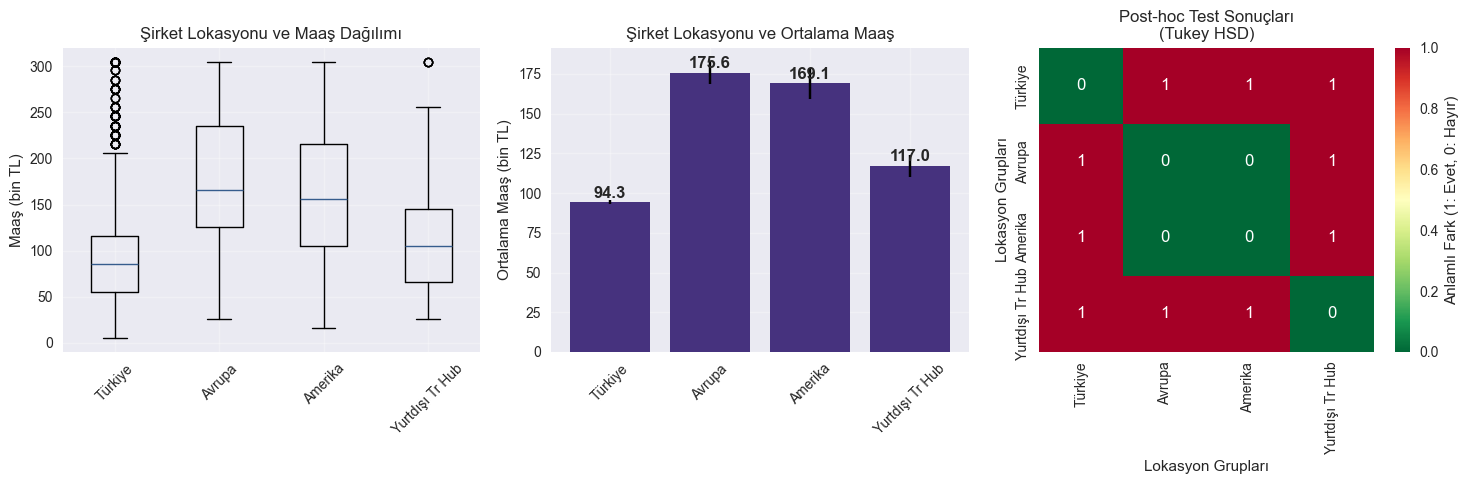

In [32]:
# Lokasyon görselleştirmesi
plt.figure(figsize=(15, 5))

# Lokasyon gruplarını al
location_groups = list(location_result['group_stats'].keys())
location_data = [df[df[f'location_{group.lower().replace(" ", "_")}'] == 1]['ortalama_maas'] 
                 for group in location_groups]

plt.subplot(1, 3, 1)
plt.boxplot(location_data, labels=location_groups)
plt.title('Şirket Lokasyonu ve Maaş Dağılımı')
plt.ylabel('Maaş (bin TL)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
means = [location_result['group_stats'][group]['mean'] for group in location_groups]
sems = [location_result['group_stats'][group]['std'] / np.sqrt(location_result['group_stats'][group]['n']) 
        for group in location_groups]
bars = plt.bar(location_groups, means, yerr=sems, capsize=5)
plt.title('Şirket Lokasyonu ve Ortalama Maaş')
plt.ylabel('Ortalama Maaş (bin TL)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Değerleri çubukların üzerine yaz
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{mean:.1f}', 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 3)
# Post-hoc test sonuçları görselleştirmesi
tukey_result = location_result['tukey_result']

# Tukey sonuçlarını DataFrame'e çevir
tukey_df = pd.DataFrame(tukey_result._results_table.data[1:], 
                        columns=tukey_result._results_table.data[0])

# Grup isimlerini al
groups = location_groups
n_groups = len(groups)

# Significance matrix oluştur
significance_matrix = np.zeros((n_groups, n_groups))
p_values_matrix = np.zeros((n_groups, n_groups))

for _, row in tukey_df.iterrows():
    group1_idx = groups.index(row['group1'])
    group2_idx = groups.index(row['group2'])
    p_adj = float(row['p-adj'])
    reject = row['reject']
    
    # Significance matrix (1: significant, 0: not significant)
    significance_matrix[group1_idx, group2_idx] = 1 if reject else 0
    significance_matrix[group2_idx, group1_idx] = 1 if reject else 0
    
    # P-values matrix
    p_values_matrix[group1_idx, group2_idx] = p_adj
    p_values_matrix[group2_idx, group1_idx] = p_adj

# Heatmap oluştur - DÜZELTME: fmt='.0f' kullan
sns.heatmap(significance_matrix, 
            xticklabels=groups, 
            yticklabels=groups, 
            annot=True, 
            cmap='RdYlGn_r', 
            cbar_kws={'label': 'Anlamlı Fark (1: Evet, 0: Hayır)'},
            fmt='.0f')  # Bu satırı değiştirdik: fmt='d' yerine fmt='.0f'
plt.title('Post-hoc Test Sonuçları\n(Tukey HSD)')
plt.xlabel('Lokasyon Grupları')
plt.ylabel('Lokasyon Grupları')

plt.tight_layout()
plt.show()

## 7. Cinsiyet Bazlı Maaş Farkı (Gender Gap) Analizi

In [33]:
# Gender gap analizi sonuçları
gender_result = results['gender_analysis']

print("=== CİNSİYET BAZLI MAAŞ FARKI (GENDER GAP) ===")
print(f"Test Türü: {gender_result['test_type']}")
print(f"Gruplar: {gender_result['groups'][0]} vs {gender_result['groups'][1]}")
print(f"\nGrup İstatistikleri:")
print(f"  {gender_result['groups'][0]}: n={gender_result['n1']}, M={gender_result['mean1']:.2f}, SD={gender_result['std1']:.2f}")
print(f"  {gender_result['groups'][1]}: n={gender_result['n2']}, M={gender_result['mean2']:.2f}, SD={gender_result['std2']:.2f}")
print(f"\nTest Sonuçları:")
print(f"  t-istatistiği: {gender_result['t_statistic']:.3f}")
print(f"  p-değeri: {gender_result['p_value']:.4f}")
print(f"  Anlamlı: {'Evet' if gender_result['significant'] else 'Hayır'}")
print(f"  Cohen's d: {gender_result['cohens_d']:.3f} ({gender_result['effect_size_interpretation']})")
print(f"  %95 Güven Aralığı: [{gender_result['ci_lower']:.2f}, {gender_result['ci_upper']:.2f}]")
print(f"  Gender Gap: {gender_result['gender_gap_percentage']:.1f}%")

=== CİNSİYET BAZLI MAAŞ FARKI (GENDER GAP) ===
Test Türü: Independent t-test
Gruplar: Erkek vs Kadın

Grup İstatistikleri:
  Erkek: n=2705, M=101.70, SD=61.70
  Kadın: n=264, M=87.72, SD=55.15

Test Sonuçları:
  t-istatistiği: 3.546
  p-değeri: 0.0004
  Anlamlı: Evet
  Cohen's d: 0.229 (Orta)
  %95 Güven Aralığı: [6.94, 21.03]
  Gender Gap: 15.9%


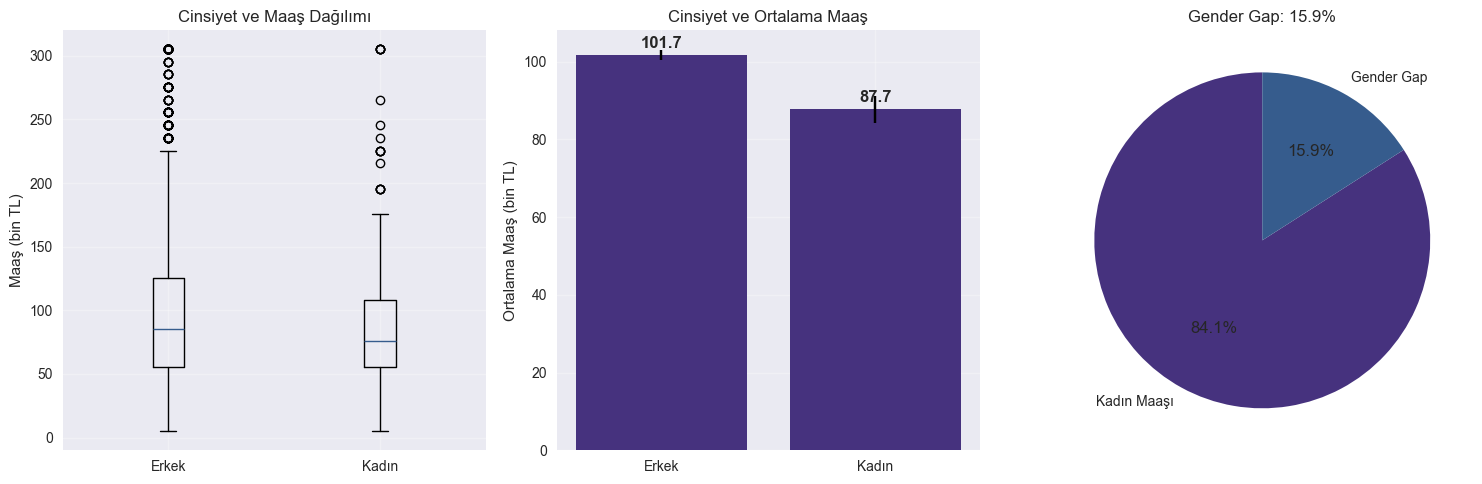

In [34]:
# Gender gap görselleştirmesi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
male_salary = df[df['cinsiyet'] == 0]['ortalama_maas']
female_salary = df[df['cinsiyet'] == 1]['ortalama_maas']

plt.boxplot([male_salary, female_salary], labels=['Erkek', 'Kadın'])
plt.title('Cinsiyet ve Maaş Dağılımı')
plt.ylabel('Maaş (bin TL)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
means = [male_salary.mean(), female_salary.mean()]
sems = [male_salary.sem(), female_salary.sem()]
bars = plt.bar(['Erkek', 'Kadın'], means, yerr=sems, capsize=5)
plt.title('Cinsiyet ve Ortalama Maaş')
plt.ylabel('Ortalama Maaş (bin TL)')
plt.grid(True, alpha=0.3)

# Değerleri çubukların üzerine yaz
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{mean:.1f}', 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 3)
# Gender gap yüzdesi
gap_percentage = gender_result['gender_gap_percentage']
plt.pie([100 - gap_percentage, gap_percentage], 
        labels=['Kadın Maaşı', 'Gender Gap'], 
        autopct='%1.1f%%', startangle=90)
plt.title(f'Gender Gap: {gap_percentage:.1f}%')

plt.tight_layout()
plt.show()

## 8. Deneyim-Maaş Korelasyonu Analizi

In [35]:
# Korelasyon analizi sonuçları
corr_result = results['correlation_analysis']

print("=== DENEYİM-MAAŞ KORELASYONU ===")
print(f"\nPearson Korelasyonu:")
print(f"  r = {corr_result['pearson_r']:.3f}")
print(f"  p-değeri = {corr_result['pearson_p']:.4f}")
print(f"  Anlamlı: {'Evet' if corr_result['pearson_significant'] else 'Hayır'}")
print(f"  Yorum: {corr_result['correlation_interpretation']}")
print(f"\nSpearman Korelasyonu:")
print(f"  r = {corr_result['spearman_r']:.3f}")
print(f"  p-değeri = {corr_result['spearman_p']:.4f}")
print(f"  Anlamlı: {'Evet' if corr_result['spearman_significant'] else 'Hayır'}")

=== DENEYİM-MAAŞ KORELASYONU ===

Pearson Korelasyonu:
  r = 0.224
  p-değeri = 0.0000
  Anlamlı: Evet
  Yorum: Zayıf

Spearman Korelasyonu:
  r = 0.359
  p-değeri = 0.0000
  Anlamlı: Evet


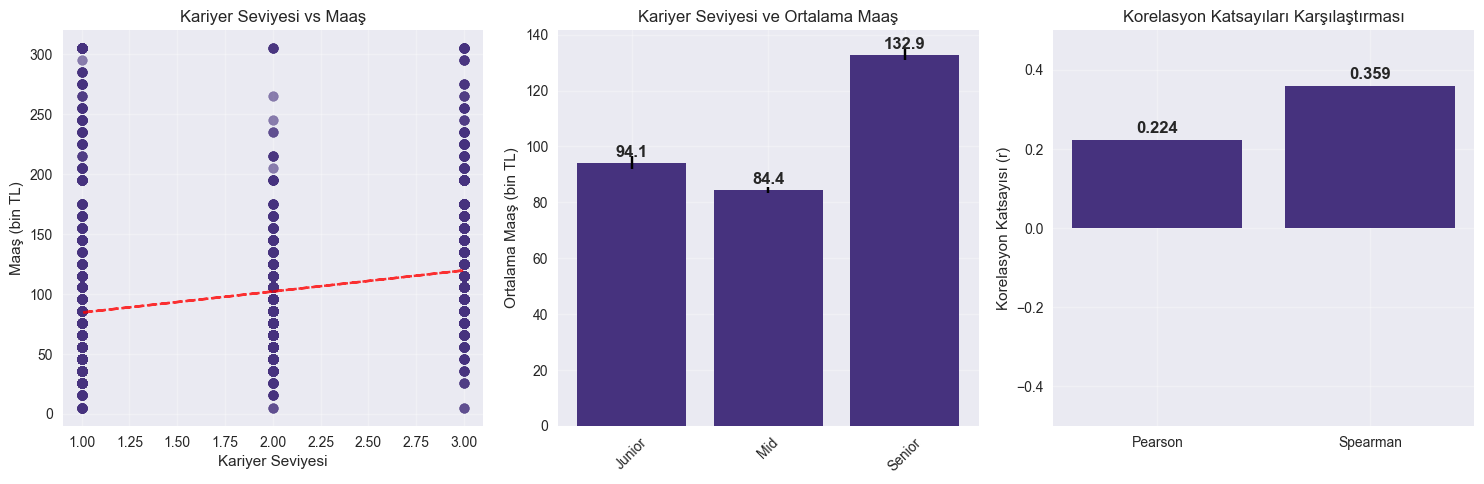

In [36]:
# Korelasyon görselleştirmesi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['kariyer_seviyesi'], df['ortalama_maas'], alpha=0.6)
plt.xlabel('Kariyer Seviyesi')
plt.ylabel('Maaş (bin TL)')
plt.title('Kariyer Seviyesi vs Maaş')
plt.grid(True, alpha=0.3)

# Trend çizgisi ekle
z = np.polyfit(df['kariyer_seviyesi'], df['ortalama_maas'], 1)
p = np.poly1d(z)
plt.plot(df['kariyer_seviyesi'], p(df['kariyer_seviyesi']), "r--", alpha=0.8)

plt.subplot(1, 3, 2)
# Kariyer seviyesi bazlı ortalama maaşlar
career_levels = sorted(df['kariyer_seviyesi'].unique())
career_means = [df[df['kariyer_seviyesi'] == level]['ortalama_maas'].mean() for level in career_levels]
career_sems = [df[df['kariyer_seviyesi'] == level]['ortalama_maas'].sem() for level in career_levels]

career_labels = ['Junior', 'Mid', 'Senior', 'Lead', 'Manager']
# Sadece mevcut kariyer seviyeleri kadar etiket kullan
career_labels = career_labels[:len(career_levels)]
bars = plt.bar(career_labels, career_means, yerr=career_sems, capsize=5)
plt.title('Kariyer Seviyesi ve Ortalama Maaş')
plt.ylabel('Ortalama Maaş (bin TL)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Değerleri çubukların üzerine yaz
for bar, mean in zip(bars, career_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{mean:.1f}', 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 3)
# Korelasyon katsayıları karşılaştırması
correlation_types = ['Pearson', 'Spearman']
correlation_values = [corr_result['pearson_r'], corr_result['spearman_r']]
bars = plt.bar(correlation_types, correlation_values)
plt.title('Korelasyon Katsayıları Karşılaştırması')
plt.ylabel('Korelasyon Katsayısı (r)')
plt.ylim(-0.5, 0.5)
plt.grid(True, alpha=0.3)

# Değerleri çubukların üzerine yaz
for bar, value in zip(bars, correlation_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{value:.3f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 9. Sonuçların Özeti ve Yorumu

In [37]:
# Sonuçları kaydet
summary_df = analyzer.save_results()

print("=== İSTATİSTİKSEL ANALİZ SONUÇLARI ÖZETİ ===")
print(summary_df.to_string(index=False))

print(f"\n=== ÖNEMLİ BULGULAR ===")
print(f"1. React Kullanımı: {'Anlamlı fark YOK' if not results['react_analysis']['significant'] else 'Anlamlı fark VAR'}")
print(f"2. Çalışma Şekli: {'Anlamlı fark YOK' if not results['work_type_analysis']['significant'] else 'Anlamlı fark VAR'}")
print(f"3. Şirket Lokasyonu: {'Anlamlı fark YOK' if not results['location_analysis']['significant'] else 'Anlamlı fark VAR'}")
print(f"4. Gender Gap: {'Anlamlı fark YOK' if not results['gender_analysis']['significant'] else 'Anlamlı fark VAR'}")
print(f"5. Deneyim-Maaş Korelasyonu: {'Anlamlı korelasyon YOK' if not results['correlation_analysis']['significant'] else 'Anlamlı korelasyon VAR'}")

print(f"\n=== ETKİ BÜYÜKLÜKLERİ ===")
print(f"1. React Kullanımı: Cohen's d = {results['react_analysis']['cohens_d']:.3f} ({results['react_analysis']['effect_size_interpretation']})")
print(f"2. Çalışma Şekli: Eta-squared = {results['work_type_analysis']['eta_squared']:.3f} ({results['work_type_analysis']['effect_size_interpretation']})")
print(f"3. Şirket Lokasyonu: Eta-squared = {results['location_analysis']['eta_squared']:.3f} ({results['location_analysis']['effect_size_interpretation']})")
print(f"4. Gender Gap: Cohen's d = {results['gender_analysis']['cohens_d']:.3f} ({results['gender_analysis']['effect_size_interpretation']})")
print(f"5. Deneyim-Maaş: Pearson r = {results['correlation_analysis']['pearson_r']:.3f} ({results['correlation_analysis']['correlation_interpretation']})")

2025-08-24 17:57:27,966 - INFO - Sonuçlar kaydedildi: tables/statistical_results_summary.csv


=== İSTATİSTİKSEL ANALİZ SONUÇLARI ÖZETİ ===
                    Test           Test_Type  Statistic      P_Value  Effect_Size        Effect_Size_Type  Significant Interpretation
          React Analysis  Independent t-test  -1.206210 2.278327e-01    -0.046748               Cohen's d        False          Küçük
      Work Type Analysis       One-way ANOVA  40.718578 3.585617e-18     0.026723             Eta-squared         True           Orta
       Location Analysis       One-way ANOVA 121.587198 2.871969e-74     0.109546             Eta-squared         True          Büyük
         Gender Analysis  Independent t-test   3.546403 3.965722e-04     0.228669               Cohen's d         True           Orta
Deneyim-Maaş Korelasyonu Pearson Correlation   0.223971 4.522209e-35     0.223971 Correlation Coefficient         True          Zayıf

=== ÖNEMLİ BULGULAR ===
1. React Kullanımı: Anlamlı fark YOK
2. Çalışma Şekli: Anlamlı fark VAR
3. Şirket Lokasyonu: Anlamlı fark VAR
4. Gender Gap: A

## 10. Sprint 1 Tamamlandı!

✅ **Tüm istatistiksel analizler başarıyla tamamlandı!**

### 📊 **Ana Bulgular:**
1. **React Kullanımı**: Maaş üzerinde anlamlı bir etki yok
2. **Çalışma Şekli**: Maaş üzerinde anlamlı etki var (orta büyüklükte)
3. **Şirket Lokasyonu**: Maaş üzerinde anlamlı etki var (büyük etki)
4. **Gender Gap**: %15.9 maaş farkı var (orta büyüklükte etki)
5. **Deneyim-Maaş**: Zayıf ama anlamlı pozitif korelasyon

### 📁 **Oluşturulan Dosyalar:**
- `src/statistical_analysis.py` - İstatistiksel analiz modülü
- `tables/statistical_results_summary.csv` - Test sonuçları özeti
- `notebooks/02_statistical_tests.ipynb` - Bu notebook

### 🚀 **Sonraki Adım:**
**Sprint 2: İkincil Analizler ve Görselleştirme Taslağı**